In [1]:
cd ..

/home/luke/projects/CS6140-MatchingPursuit


In [2]:
%load_ext autoreload
%autoreload 2

In [17]:
from utils.dataset_utils import *
from utils.dictionary_generation import *
from utils.matching_pursuit import *
from utils.metrics import *

import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm_notebook as tqdm
from IPython.display import HTML


In [4]:
num_frames = 200

images = loadVideo("dataset/2011_09_26", num_frames)

In [5]:
images = cropImages(images)

print("Num images: ", len(images))
print("Cropped Image size: ", np.shape(images[0]))

Num images:  114
Cropped Image size:  (200, 200)


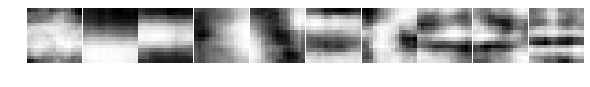

In [6]:
# Generate Dictionaries
patch_size = 15
num_samples = 500
num_features = 10

pca_features = generatePCADictionary(images, patch_size, num_samples, num_features)
# optsparse_features = generateOptSparseDictionary(images, patch_size, num_samples, num_features)

plotDictionary(pca_features, "PCA")
# plotDictionary(optsparse_features, "OptSparse")

In [ ]:
# Run through whole video
k = 200

# Test all algorithms
S_codes_pca_greedy = videoMatchingPursuit(images, pca_features, k, greedyMatchingPursuit)
S_codes_pca_conv = videoMatchingPursuit(images, pca_features, k, convolutionalMatchingPursuit)
# S_codes_pca_orth = videoMatchingPursuit(images, pca_features, k, orthogonalMatchingPursuit)


# Test other Dictionaries
# S_codes_optsparse = videoMatchingPursuit(images, optsparse_features, k, orthogonalMatchingPursuit)

# Generate Videos
recon_video_pca_greedy = generateReconVideo(S_codes_pca_greedy, images, pca_features)
recon_video_pca_conv = generateReconVideo(S_codes_pca_conv, images, pca_features)
# recon_video_pca_orth = generateReconVideo(S_codes_pca_orth, images, pca_features)

# recon_video_optsparse = generateReconVideo(S_codes_optsparse, images, optsparse_features)

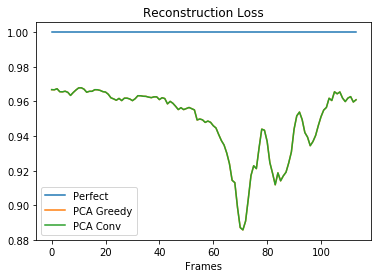

In [21]:
# Plot the loss as a function of time
recon_loss_pca_greedy = videoLoss(images, recon_video_pca_greedy, reconstructionRatio)
recon_loss_pca_conv = videoLoss(images, recon_video_pca_conv, reconstructionRatio)
# recon_loss_pca_orth = videoLoss(images, recon_video_pca_orth, reconstructionRatio)

# Other dictionaries
# recon_loss_optsparse = videoLoss(images, recon_video_optsparse, reconstructionRatio)

plt.plot(np.ones(len(images)), label="Perfect")
plt.plot(recon_loss_pca_greedy, label="PCA Greedy")
plt.plot(recon_loss_pca_conv, label="PCA Conv")
# plt.plot(recon_loss_pca_orth, label="PCA Greedy")

# plt.plot(recon_loss_optsparse, "g", label="OptSparse")
plt.xlabel("Frames")
plt.legend()
plt.title("Reconstruction Loss")
plt.show()

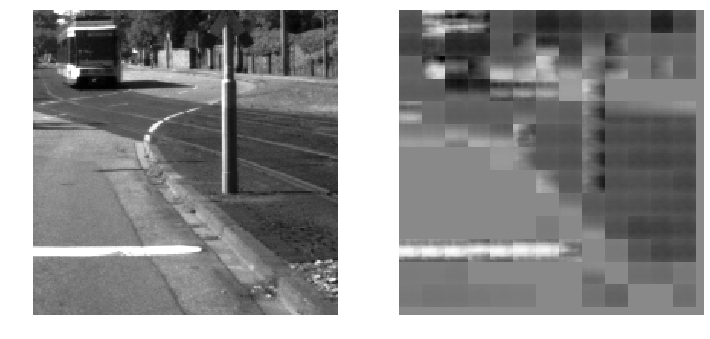

In [22]:
ani = compareVideos(images, recon_video_pca);
HTML(ani.to_html5_video())

In [11]:
# ani = compareVideos(images, recon_video_optsparse);
# HTML(ani.to_html5_video())